In [ ]:
import pandas as pd
data = pd.read_csv("Income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

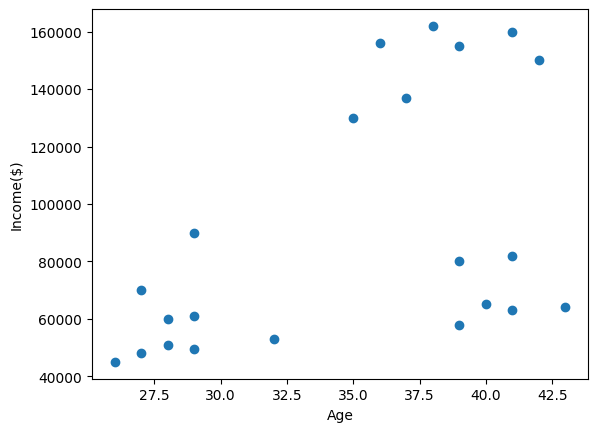

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
###データ整えるphase (scalingとXにデータ入れる)###

#AgeとIncomeに大きな縮尺差があるからscalingする、***これしないと正しくclustering正しく出来ない***
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
#直接dataの内容を変えるから
data[['Age', 'Income($)']] = sc_X.fit_transform(data[['Age', 'Income($)']])
#Xという変数を変えるだけなら X = sc_X.fit_transform(X) KNNの時はこっちだった

X = data[['Age','Income($)']] #XにAgeとIncome data入れる

In [ ]:
#Xのデータ(AgeとIncome)をclusteringして、仕分けましょう
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

y_prediction = kmeans.predict(X)
print(y_prediction) #今回K=3を選択したから、dataが0type, 1type, or 2typeに仕分けられる arrayに入ってる
data['cluster'] = y_prediction #Cluster columnをdataに追加しておく

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


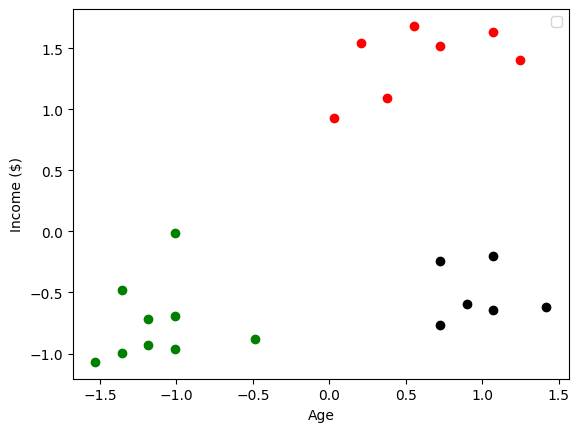

In [ ]:
#clusteringした結果を図示
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color='red')
plt.scatter(data3['Age'],data3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()



In [ ]:
#それぞれのclusterのcenter point eodi
kmeans.cluster_centers_ #単純にcluster毎のセンターのcoordinate 今回は3グループ分
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])

[[-1.1247901  -0.74862223]
 [ 0.60143983  1.40141653]
 [ 0.98550535 -0.51205261]]
[-1.1247901   0.60143983  0.98550535]
[-0.74862223  1.40141653 -0.51205261]


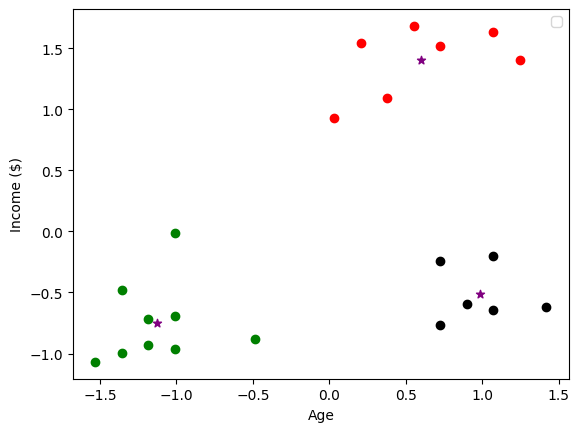

In [ ]:
###それぞれclusterグループのセンターのcoordinate入れたグラフ###
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1['Age'],data1['Income($)'],color='green')
plt.scatter(data2['Age'],data2['Income($)'],color='red')
plt.scatter(data3['Age'],data3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#計算自体はscaledされたXによって行われている

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [ ]:
###最適なK値を探す方法###
#それぞれのクラスターおけるdataが、それぞれのクラスターcenter pointからどれだけズレてるかを、クラスター毎のSSEを合計して確認
#SSE = Σ (x - μ)²

sse = []
k_range = range(1,10) #creating a sequence of numbers from 1 to 9 (大体10個くらい試してみる)
for k in k_range:
    kmeans_find_k = KMeans(n_clusters=k)
    kmeans_find_k.fit(X)
    sse.append(kmeans_find_k.inertia_) #inertia_はsklearnにおいてthe sum of squared distances to their closest cluster center.
sse


###append() method 引数を加える###
#numbers = [1, 2, 3]
#numbers.append(4)
#print(numbers)  # prints: [1, 2, 3, 4]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[44.000000000000014,
 16.194890274706776,
 3.889308657130144,
 2.828763380093525,
 2.1690542993949653,
 1.7149245376922924,
 1.3782407911524643,
 1.1381423725542028,
 0.8830271764956261]

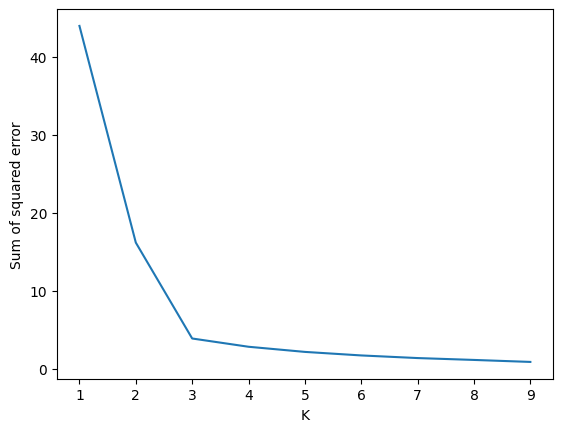

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)
#decreaseの勢いが落ちるK=3が最適K